In [1]:
import pandas as pd
import seaborn as sns # plotting with seaborn
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.preprocessing import MinMaxScaler # alt scaling
from sklearn.decomposition import PCA # Feature extraction
import matplotlib.pyplot as plt # plotting with pyplot
from sklearn.cluster import KMeans # calculate KMeans clustering
import sklearn.metrics as metrics # calculate silhouetted
from sklearn.manifold import TSNE # Feature dimension reduction
import time # timing TSNE
import numpy as np # for random
from scipy.spatial import distance  # calculate euclidean distance

In [2]:
pro_df = pd.read_csv('raw_pro_match_data.csv')
pro_df

match_id  account_id  deaths  kills  assists  hero_id  win  lose  \
0      6482729093   380846786       9      6        9        8    0     1   
1      4831709375    79922175      10      8       15       17    0     1   
2      4831709375   353682380      10      7       15       21    0     1   
3      4831709375    44544729       9      9       13        9    0     1   
4      6479247891   126174633       8      1        7       16    0     1   
...           ...         ...     ...    ...      ...      ...  ...   ...   
94854  3606473237   104185879       7      6       18       13    0     1   
94855  3606473237    43619695       7     16       13       54    0     1   
94856  6490445472   464484939       4      5       16       49    1     0   
94857  6490445472   276901240       8      3       15       58    1     0   
94858  6490445472   101779337       7      5       11      123    0     1   

       kda  gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
0        1               500             692           0.171184   
1        2               477             746           0.188976   
2        2               351             554           0.165354   
3        2               390             618           0.212598   
4        0               372             433           0.032680   
...    ...               ...             ...                ...   
94854    3               556             768           0.142574   
94855    3               590             740           0.380198   
94856    4               482             598           0.154639   
94857    2               311             452           0.092784   
94858    2               307             399           0.154639   

       last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
0                   7.560628          0.300630        0.394544   
1                   5.929134          0.360308        0.610790   
2                   2.763780          0.297561        0.373984   
3                   4.204724          0.691164        0.763006   
4                   5.424837          0.156146        0.094352   
...                      ...               ...             ...   
94854               6.510891          0.602516        0.650314   
94855               6.582178          0.669256        0.608213   
94856               6.123711          0.623644        0.456616   
94857               1.917526          0.316265        0.329819   
94858               1.546392          0.300140        0.189341   

       kills_per_min_pct  last_hits_per_min_pct  \
0               0.314795               0.570304   
1               0.270713               0.534682   
2               0.439024               0.348780   
3               0.810074               0.872832   
4               0.045183               0.665781   
...                  ...                    ...   
94854           0.217610               0.679245   
94855           0.879023               0.563818   
94856           0.569414               0.829718   
94857           0.301205               0.400602   
94858           0.568724               0.352034   

                                                non_pros  
0      [870090200, 154832846, 1235377991, 1241674874,...  
1      [304493797, 196954921, 129202617, 107562000, 1...  
2      [304493797, 196954921, 129202617, 107562000, 1...  
3      [304493797, 196954921, 129202617, 107562000, 1...  
4                                 [109672458, 273428564]  
...                                                  ...  
94854  [179256735, 343559358, 325905776, 92183839, 24...  
94855  [179256735, 343559358, 325905776, 92183839, 24...  
94856       [307524380, 377578227, 135025253, 185225774]  
94857       [307524380, 377578227, 135025253, 185225774]  
94858       [307524380, 377578227, 135025253, 185225774]  

[94859 rows x 18 columns]

In [3]:
reg_df = pd.read_csv('raw_reg_match_data.csv')
reg_df

match_id  account_id  deaths  kills  assists  hero_id  win  lose  \
0       6389268061   202972701       7      5       14      119    1     0   
1       6389268061   910160598       5      9       10       25    1     0   
2       6389268061   390073012       8      2       12        3    0     1   
3       6389268061   185732279       5      2       12       71    0     1   
4       6149055934    73806805      13      6       12      135    0     1   
...            ...         ...     ...    ...      ...      ...  ...   ...   
196521  5947416169   370685636      13      0        9      111    0     1   
196522  5262890835   208421007      11      9        7       98    0     1   
196523  5262890835   122459066       5      9       12       94    0     1   
196524  5262890835   118925774       8      8       16       28    0     1   
196525  5262890835   442391802       6      4       13       93    0     1   

        kda  gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
0         2               379             581           0.142721   
1         3               629             780           0.256898   
2         1               213             364           0.057088   
3         2               361             513           0.057088   
4         1               389             484           0.176730   
...     ...               ...             ...                ...   
196521    0               215             302           0.000000   
196522    1               367             522           0.222222   
196523    3               677             903           0.222222   
196524    2               313             532           0.197531   
196525    2               401             666           0.098765   

        last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
0                    1.969553          0.742726        0.687596   
1                    8.306375          0.802285        0.762742   
2                    0.713606          0.144538        0.275630   
3                    4.424358          0.470884        0.376506   
4                    4.094256          0.370236        0.254083   
...                       ...               ...             ...   
196521               0.877621          0.109840        0.109840   
196522               4.074074          0.200750        0.281426   
196523              11.728395          0.603106        0.930975   
196524               2.222222          0.115200        0.350400   
196525               5.950617          0.222340        0.454255   

        kills_per_min_pct  last_hits_per_min_pct  \
0                0.568147               0.718224   
1                0.632689               0.836555   
2                0.406723               0.526050   
3                0.180723               0.842369   
4                0.560799               0.464610   
...                   ...                    ...   
196521           0.052632               0.441648   
196522           0.562852               0.384615   
196523           0.700604               0.811907   
196524           0.633600               0.081600   
196525           0.191489               0.591489   

                                               pros  
0                                       [339686412]  
1                                       [339686412]  
2                                       [339686412]  
3                                       [339686412]  
4                                       [336806747]  
...                                             ...  
196521  [141690233, 420930889, 348703642, 86300851]  
196522                       [849000855, 455063612]  
196523                       [849000855, 455063612]  
196524                       [849000855, 455063612]  
196525                       [849000855, 455063612]  

[196526 rows x 18 columns]

In [4]:
'''filtered_features = ['deaths', 'kills', 'assists', 'kda', 'gold_per_min_raw',
                     'xp_per_min_raw', 'kills_per_min_raw', 'last_hits_per_min_raw']

pro_df = pro_df[filtered_features]
reg_df = reg_df[filtered_features]'''

"filtered_features = ['deaths', 'kills', 'assists', 'kda', 'gold_per_min_raw',\n                     'xp_per_min_raw', 'kills_per_min_raw', 'last_hits_per_min_raw']\n\npro_df = pro_df[filtered_features]\nreg_df = reg_df[filtered_features]"

In [5]:
# cluster centers are based on PC0, PC1, PC2, PC3

# To check if a regular player plays more like a pro
# we would calculate that player's principle components in both Pro and Reg datasets
# Then compare the euclidean distance to both cluster centers
# shortest distance should indicate whether that player plays more like a pro than a regular player

In [6]:
# select a random player to test
test_player = reg_df.sample()
test_player

match_id  account_id  deaths  kills  assists  hero_id  win  lose  \
94176  6418990888   121573285       9      4       37       97    1     0   

       kda  gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
94176    4               340             604           0.099792   

       last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
94176               1.322245          0.340249        0.572614   

       kills_per_min_pct  last_hits_per_min_pct        pros  
94176           0.475795               0.098202  [87360406]

In [7]:
# remove the test player from dataframe so we can add it to the end of a new dataframe (easy to track)
reg_df = reg_df.drop(index=test_player.index.values).reset_index(drop = True)
reg_df.loc[test_player.index.values,:]

match_id  account_id  deaths  kills  assists  hero_id  win  lose  \
94176  6418990888    81951838       6     11       16       76    1     0   

       kda  gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
94176    3               493             693           0.274428   

       last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
94176               4.540541          0.521739        0.576438   

       kills_per_min_pct  last_hits_per_min_pct        pros  
94176           0.563815               0.460028  [87360406]

In [8]:
#limiting dataframe size for TSNE
pro_df = pro_df.sample(frac=0.1, random_state=1).reset_index(drop=True)
reg_df = reg_df.sample(frac=0.1, random_state=1).reset_index(drop=True)

# add the test player to end of both subset dataframes
pro_df = pd.concat([pro_df, test_player], ignore_index=True)
reg_df = pd.concat([reg_df, test_player], ignore_index=True)

In [9]:
reg_df.tail()

match_id  account_id  deaths  kills  assists  hero_id  win  lose  \
19648  6186961479   890922407      11      5        8       10    0     1   
19649  3841505473   100874284       3     11       27       86    1     0   
19650  6233128444  1019170898       7     11       11       32    0     1   
19651  6486823921   318022554       1     10       18       89    1     0   
19652  6418990888   121573285       9      4       37       97    1     0   

       kda  gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
19648    1               466             517           0.115518   
19649    9               509             652           0.284360   
19650    2               488             759           0.331825   
19651   14               696             887           0.286123   
19652    4               340             604           0.099792   

       last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
19648               6.769349          0.253892        0.154491   
19649               2.533391          0.979346        0.884108   
19650               4.132730          0.658088        0.759191   
19651               8.383405          0.676230        0.942623   
19652               1.322245          0.340249        0.572614   

       kills_per_min_pct  last_hits_per_min_pct  \
19648           0.200000               0.390419   
19649           0.945496               0.741251   
19650           0.685662               0.687500   
19651           0.819672               0.336066   
19652           0.475795               0.098202   

                                   pros  
19648                       [259363208]  
19649  [389033587, 99573176, 120109512]  
19650                       [189305343]  
19651                       [197335328]  
19652                        [87360406]

In [10]:
filtered_features = ['deaths', 'kills', 'assists', 'kda', 'gold_per_min_raw',
                     'xp_per_min_raw', 'kills_per_min_raw', 'last_hits_per_min_raw']

subset_pro_df = pro_df[filtered_features]
subset_reg_df = reg_df[filtered_features]

subset_pro_df

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0          8      7       22    3               324             624   
1          8      1        8    1               304             383   
2          5      6       16    3               489             665   
3          5     19        4    3               713             839   
4          9     10       20    3               500             668   
...      ...    ...      ...  ...               ...             ...   
9482       8      1        8    1               275             412   
9483      12      4        7    0               226             289   
9484       4     27       20    9               825             899   
9485       0      4       11   15               826             746   
9486       9      4       37    4               340             604   

      kills_per_min_raw  last_hits_per_min_raw  
0              0.175219               2.077597  
1              0.032241               4.255776  
2              0.183767               4.563553  
3              0.506892              10.484660  
4              0.320171               5.410886  
...                 ...                    ...  
9482           0.029571               1.123706  
9483           0.123520               1.080803  
9484           0.625966               8.717156  
9485           0.125523              13.964435  
9486           0.099792               1.322245  

[9487 rows x 8 columns]

In [11]:
subset_pro_df.head()

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0       8      7       22    3               324             624   
1       8      1        8    1               304             383   
2       5      6       16    3               489             665   
3       5     19        4    3               713             839   
4       9     10       20    3               500             668   

   kills_per_min_raw  last_hits_per_min_raw  
0           0.175219               2.077597  
1           0.032241               4.255776  
2           0.183767               4.563553  
3           0.506892              10.484660  
4           0.320171               5.410886

In [12]:
scaler = StandardScaler()

# scaling original dfs
# scaled_pro_df = scaler.fit_transform(pro_df)
# scaled_reg_df = scaler.fit_transform(reg_df)

# scaling subset dfs
scaled_subset_pro_df = scaler.fit_transform(subset_pro_df)
scaled_subset_reg_df = scaler.fit_transform(subset_reg_df)

In [13]:
scaled_subset_pro_df

array([[ 0.34660795, -0.04040356,  1.25800383, ...,  0.15036259,
        -0.16950135, -0.90760311],
       [ 0.34660795, -1.27027058, -0.84460046, ..., -1.28349886,
        -1.24153883, -0.21986103],
       [-0.50748806, -0.24538139,  0.3568877 , ...,  0.39429752,
        -0.10540774, -0.1226832 ],
       ...,
       [-0.79218673,  4.05915317,  0.95763179, ...,  1.78651154,
         3.21015609,  1.18878255],
       [-1.93098141, -0.65533707, -0.3940424 , ...,  0.87621776,
        -0.54211726,  2.84556735],
       [ 0.63130662, -0.65533707,  3.51079413, ...,  0.03136993,
        -0.73504517, -1.14609913]])

# Principle Components

[0.57786892 0.7470587  0.86494403 0.94305659 0.97684556 0.992564
 0.99775578 1.        ]
[0.57752911 0.74591056 0.86223164 0.94228401 0.97588039 0.99213713
 0.99788986 1.        ]


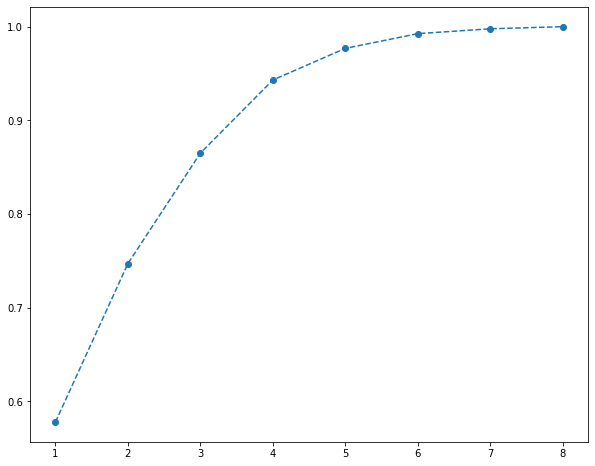

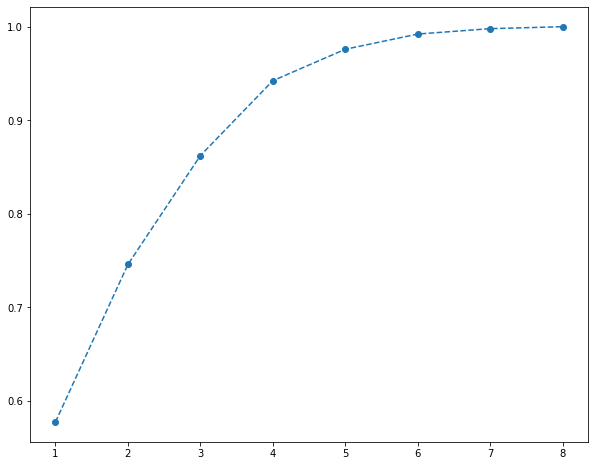

In [14]:
# Getting Principle Component values per dataframe
def create_pc_df(data_frame):
    pca = PCA()
    pc = pca.fit_transform(data_frame)
    pc_cols = []
    for i in range(len(subset_pro_df.columns)):
        pc_cols.append(f'PC{i}')

    # printing the cumulative sum of variance of each Principle Component
    print(pca.explained_variance_ratio_.cumsum())
    
    # making a plot of the cumulative sum of variance
    plt.figure(figsize = (10, 8))
    plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
    
    return(pd.DataFrame(data=pc, columns=pc_cols))
    
# calling function
# pro_pc_df = create_pc_df(scaled_pro_df)
subset_pro_pc_df = create_pc_df(scaled_subset_pro_df)

# reg_pc_df = create_pc_df(scaled_reg_df)
subset_reg_pc_df = create_pc_df(scaled_subset_reg_df)

In [15]:
print(subset_pro_pc_df.describe())
print(subset_reg_pc_df.describe())

               PC0           PC1          PC2           PC3           PC4  \
count  9487.000000  9.487000e+03  9487.000000  9.487000e+03  9.487000e+03   
mean      0.000000  3.145651e-17     0.000000 -2.143911e-17  7.489646e-19   
std       2.150218  1.163469e+00     0.971176  7.905481e-01  5.199425e-01   
min      -4.719890 -3.191635e+00    -4.059156 -3.038221e+00 -1.166367e+00   
25%      -1.661410 -8.327172e-01    -0.615873 -5.184928e-01 -3.281348e-01   
50%      -0.265578 -8.183761e-02    -0.014846 -9.171686e-03 -1.073932e-01   
75%       1.416889  7.615685e-01     0.600977  5.074615e-01  2.005259e-01   
max      10.939417  5.435442e+00     5.820046  4.871462e+00  4.619666e+00   

                PC5           PC6           PC7  
count  9.487000e+03  9.487000e+03  9.487000e+03  
mean  -5.898096e-18 -2.855428e-18 -2.476264e-17  
std    3.546277e-01  2.038103e-01  1.339986e-01  
min   -1.458315e+00 -1.285307e+00 -7.293347e-01  
25%   -2.257753e-01 -1.238920e-01 -6.441592e-02  
50%   

In [16]:
# 4 principle components explain 94% variance
# set pc dataframe to first 4 columns
# pro_pc_df = pro_pc_df.iloc[:, :4]
# reg_pc_df = reg_pc_df.iloc[:, :4]
sub_pro_pc_df = subset_pro_pc_df.iloc[:, :4]
sub_reg_pc_df = subset_reg_pc_df.iloc[:, :4]

sub_reg_pc_df

PC0       PC1       PC2       PC3
0      0.826115  2.667004 -1.602787  1.697991
1     -0.296378 -0.118533 -0.984249 -0.360666
2      0.057460  0.863497  1.146560  0.370306
3     -1.128144 -0.757312 -1.111855 -0.549866
4      1.352075 -0.340725 -0.326590 -0.843644
...         ...       ...       ...       ...
19648 -0.672043 -1.416622  0.165817 -0.566200
19649  1.769811  2.710824 -0.234896  0.325560
19650  1.267059 -0.300242  1.074304  0.074307
19651  4.129150  1.295264 -1.616459  0.178366
19652 -1.098287  3.300216 -0.139884 -1.706948

[19653 rows x 4 columns]

In [17]:
# adding the Principle components to the original dataframes
# reg_df = pd.concat([reg_df, reg_pc_df], axis=1)
# pro_df = pd.concat([pro_df, pro_pc_df], axis=1)
subset_reg_df = pd.concat([subset_reg_df, sub_reg_pc_df], axis=1)
subset_pro_df = pd.concat([subset_pro_df, sub_pro_pc_df], axis=1)

subset_reg_df

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0           1      7       20   13               345             586   
1           5      3       13    2               468             679   
2           8     11       16    3               366             631   
3           7      1       11    1               392             586   
4           6      8       15    3               575             726   
...       ...    ...      ...  ...               ...             ...   
19648      11      5        8    1               466             517   
19649       3     11       27    9               509             652   
19650       7     11       11    2               488             759   
19651       1     10       18   14               696             887   
19652       9      4       37    4               340             604   

       kills_per_min_raw  last_hits_per_min_raw       PC0       PC1       PC2  \
0               0.159696               1.254753  0.826115  2.667004 -1.602787   
1               0.086580               3.376623 -0.296378 -0.118533 -0.984249   
2               0.255220               1.345708  0.057460  0.863497  1.146560   
3               0.030151               5.246231 -1.128144 -0.757312 -1.111855   
4               0.194411               7.436209  1.352075 -0.340725 -0.326590   
...                  ...                    ...       ...       ...       ...   
19648           0.115518               6.769349 -0.672043 -1.416622  0.165817   
19649           0.284360               2.533391  1.769811  2.710824 -0.234896   
19650           0.331825               4.132730  1.267059 -0.300242  1.074304   
19651           0.286123               8.383405  4.129150  1.295264 -1.616459   
19652           0.099792               1.322245 -1.098287  3.300216 -0.139884   

            PC3  
0      1.697991  
1     -0.360666  
2      0.370306  
3     -0.549866  
4     -0.843644  
...         ...  
19648 -0.566200  
19649  0.325560  
19650  0.074307  
19651  0.178366  
19652 -1.706948  

[19653 rows x 12 columns]

# T-SNE

In [18]:
# T-SNE
# feature dimension reduction makes plotting visually better
def get_tsne(df, n):
    return TSNE(n_components=n,random_state=1).fit_transform(df)

startTime = time.time()

# takes a long time so for now we are testing with a random sample
# getting 3 TSNE components for 3d plot
sub_pro_tsne = get_tsne(sub_pro_pc_df, 3)
sub_reg_tsne = get_tsne(sub_reg_pc_df, 3)

executionTime = (time.time() - startTime)

print('Execution time in seconds: ' + str(executionTime))

c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Execution time in seconds: 566.5807933807373


In [19]:
# converting np array to dataframe
pro_tsne_df = pd.DataFrame(sub_pro_tsne, columns = ['TSNE0', 'TSNE1', 'TSNE2'])
reg_tsne_df = pd.DataFrame(sub_reg_tsne, columns = ['TSNE0', 'TSNE1', 'TSNE2'])
pro_tsne_df

TSNE0      TSNE1      TSNE2
0      4.519973   8.348733  -1.326156
1    -11.948339   1.747242  -7.274708
2      5.106826  -2.525380  -5.350808
3     16.336672 -10.934327  10.459717
4      6.645748   0.390074   5.052519
...         ...        ...        ...
9482 -14.953732   6.687454  -7.202353
9483 -20.688589   7.445122   0.815503
9484  20.928274  -6.733983   8.993147
9485  16.695843 -15.456014  -2.995458
9486   7.696375  16.304565  -2.306898

[9487 rows x 3 columns]

In [20]:
# concating dataframes
subset_reg_df = pd.concat([subset_reg_df, reg_tsne_df], axis=1)
subset_pro_df = pd.concat([subset_pro_df, pro_tsne_df], axis=1)

subset_pro_df

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0          8      7       22    3               324             624   
1          8      1        8    1               304             383   
2          5      6       16    3               489             665   
3          5     19        4    3               713             839   
4          9     10       20    3               500             668   
...      ...    ...      ...  ...               ...             ...   
9482       8      1        8    1               275             412   
9483      12      4        7    0               226             289   
9484       4     27       20    9               825             899   
9485       0      4       11   15               826             746   
9486       9      4       37    4               340             604   

      kills_per_min_raw  last_hits_per_min_raw       PC0       PC1       PC2  \
0              0.175219               2.077597 -0.899309  1.424589  0.350040   
1              0.032241               4.255776 -2.333477 -0.926838 -0.738468   
2              0.183767               4.563553  0.185020  0.282844 -0.440157   
3              0.506892              10.484660  3.928308 -1.669346  1.674912   
4              0.320171               5.410886  0.659903  0.690033  1.058621   
...                 ...                    ...       ...       ...       ...   
9482           0.029571               1.123706 -2.709984 -0.482335 -0.502608   
9483           0.123520               1.080803 -3.093392 -0.647658  0.935600   
9484           0.625966               8.717156  5.729915  1.222152  2.341602   
9485           0.125523              13.964435  3.552368 -0.531819 -3.466651   
9486           0.099792               1.322245 -1.491892  3.235661 -0.196510   

           PC3      TSNE0      TSNE1      TSNE2  
0    -0.384309   4.519973   8.348733  -1.326156  
1     0.446680 -11.948339   1.747242  -7.274708  
2    -0.279363   5.106826  -2.525380  -5.350808  
3     0.270491  16.336672 -10.934327  10.459717  
4    -0.718423   6.645748   0.390074   5.052519  
...        ...        ...        ...        ...  
9482  0.720959 -14.953732   6.687454  -7.202353  
9483  0.966221 -20.688589   7.445122   0.815503  
9484  0.085289  20.928274  -6.733983   8.993147  
9485 -0.048509  16.695843 -15.456014  -2.995458  
9486 -1.684631   7.696375  16.304565  -2.306898  

[9487 rows x 15 columns]

# KMeans: Calculating k clusters using elbow method and silhouette

In [21]:
K = range(1, 12)
wss = []
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    km = km.fit(sub_reg_pc_df)
    # within-cluster SSE given by km.inertia_
    wss_score = km.inertia_
    wss.append(wss_score)

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

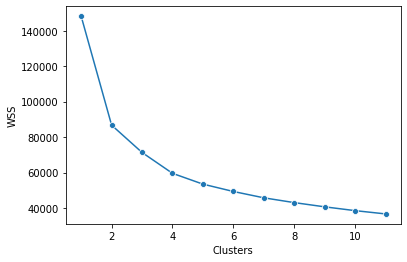

In [22]:
# Elbow Method for reg pca

cluster_centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

sns.lineplot(x = 'Clusters', y = 'WSS', data = cluster_centers, marker = 'o')

In [23]:
# Sihoulette method for reg pca

for i in range(3, 10):
    labels = KMeans(n_clusters = i, init = 'k-means++', random_state = 200).fit(sub_reg_pc_df).labels_
    print("Silhouette score for k(clusters = "+str(i)+" is " 
    +str(metrics.silhouette_score(sub_reg_pc_df, labels, metric = 'euclidean', sample_size = 1000, random_state = 200)))

Silhouette score for k(clusters = 3 is 0.26493085984812376
Silhouette score for k(clusters = 4 is 0.25303862210189887
Silhouette score for k(clusters = 5 is 0.2322182611892008
Silhouette score for k(clusters = 6 is 0.2255482166663379
Silhouette score for k(clusters = 7 is 0.20999136251035827
Silhouette score for k(clusters = 8 is 0.2058773213244476
Silhouette score for k(clusters = 9 is 0.20360098164172374


In [24]:
K = range(1, 12)
wss = []
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    km = km.fit(sub_pro_pc_df)
    # within-cluster SSE given by km.inertia_
    wss_score = km.inertia_
    wss.append(wss_score)

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

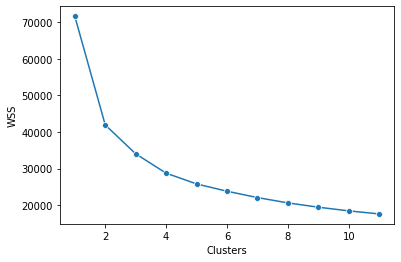

In [25]:
# Elbow Method for pro pca

cluster_centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

sns.lineplot(x = 'Clusters', y = 'WSS', data = cluster_centers, marker = 'o')

In [26]:
# Sihoulette method for pro pca

for i in range(3, 10):
    labels = KMeans(n_clusters = i, init = 'k-means++', random_state = 200).fit(sub_pro_pc_df).labels_
    print("Silhouette score for k(clusters = "+str(i)+" is " 
    +str(metrics.silhouette_score(sub_pro_pc_df, labels, metric = 'euclidean', sample_size = 1000, random_state = 200)))

Silhouette score for k(clusters = 3 is 0.26363180995550295
Silhouette score for k(clusters = 4 is 0.2648672844659664
Silhouette score for k(clusters = 5 is 0.24508316374813802
Silhouette score for k(clusters = 6 is 0.23532502351705012
Silhouette score for k(clusters = 7 is 0.23044607621562002
Silhouette score for k(clusters = 8 is 0.22837777219480854
Silhouette score for k(clusters = 9 is 0.2064901365339054


Silhouette suggests three or four clusters, elbow method suggests three.
We will use three clusters.

In [27]:
km_pro = KMeans(n_clusters = 3, init='k-means++', random_state = 42)

km_pro.fit(sub_pro_pc_df)

KMeans(n_clusters=3, random_state=42)

In [28]:
km_reg = KMeans(n_clusters = 3, init='k-means++', random_state = 42)

km_reg.fit(sub_reg_pc_df)

KMeans(n_clusters=3, random_state=42)

In [116]:
# adding Cluster classifcation to dataframes
subset_pro_df['Cluster'] = km_pro.labels_
subset_reg_df['Cluster'] = km_reg.labels_

# adding Cluster classification to original sample df for processing information about clusters later
pro_df['Cluster'] = km_pro.labels_
reg_df['Cluster'] = km_reg.labels_
pro_df

match_id  account_id  deaths  kills  assists  hero_id  win  lose  kda  \
0     5839738768    48823667       8      7       22        5    1     0    3   
1     5411456140   835676420       8      1        8       98    0     1    1   
2     5967219701    26771994       5      6       16       16    1     0    3   
3     5812356294   213326423       5     19        4       70    0     1    3   
4     5263282308    85375207       9     10       20       98    1     0    3   
...          ...         ...     ...    ...      ...      ...  ...   ...  ...   
9482  6403123685   276901240       8      1        8       84    0     1    1   
9483  5576074840    82507234      12      4        7      119    0     1    0   
9484  6449482073   101586543       4     27       20       13    1     0    9   
9485  6458974436    85367644       0      4       11      109    1     0   15   
9486  6418990888   121573285       9      4       37       97    1     0    4   

      gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
0                  324             624           0.175219   
1                  304             383           0.032241   
2                  489             665           0.183767   
3                  713             839           0.506892   
4                  500             668           0.320171   
...                ...             ...                ...   
9482               275             412           0.029571   
9483               226             289           0.123520   
9484               825             899           0.625966   
9485               826             746           0.125523   
9486               340             604           0.099792   

      last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
0                  2.077597          0.560472        0.864307   
1                  4.255776          0.065666        0.076923   
2                  4.563553          0.585382        0.559468   
3                 10.484660          0.935990        0.855072   
4                  5.410886          0.664165        0.637899   
...                     ...               ...             ...   
9482               1.123706          0.223158        0.234211   
9483               1.080803          0.104135        0.065850   
9484               8.717156          0.993711        0.935849   
9485              13.964435          0.951705        0.721591   
9486               1.322245          0.340249        0.572614   

      kills_per_min_pct  last_hits_per_min_pct  \
0              0.836775               0.831858   
1              0.033771               0.429644   
2              0.558804               0.432558   
3              0.870773               0.995169   
4              0.808630               0.692308   
...                 ...                    ...   
9482           0.128947               0.363684   
9483           0.486983               0.376723   
9484           0.978616               0.943396   
9485           0.380682               0.980114   
9486           0.475795               0.098202   

                                               non_pros        pros  Cluster  
0                                [417604379, 296702734]         NaN        0  
1          [181863221, 158652775, 223831161, 338261724]         NaN        0  
2          [122571057, 152051501, 182016245, 181145254]         NaN        1  
3     [81006230, 158707562, 76823347, 47381526, 9137...         NaN        2  
4     [1025693753, 1062104047, 383875956, 136571075,...         NaN        1  
...                                                 ...         ...      ...  
9482  [350162865, 419224667, 919090208, 1042216034, ...         NaN        0  
9483  [259142899, 117801871, 191239768, 197112752, 2...         NaN        0  
9484       [136818379, 138991424, 138094966, 136769473]         NaN        2  
9485       [175057685, 155807130, 167708749, 205091503]         NaN        2  
9486                                               

In [30]:
subset_pro_df

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0          8      7       22    3               324             624   
1          8      1        8    1               304             383   
2          5      6       16    3               489             665   
3          5     19        4    3               713             839   
4          9     10       20    3               500             668   
...      ...    ...      ...  ...               ...             ...   
9482       8      1        8    1               275             412   
9483      12      4        7    0               226             289   
9484       4     27       20    9               825             899   
9485       0      4       11   15               826             746   
9486       9      4       37    4               340             604   

      kills_per_min_raw  last_hits_per_min_raw       PC0       PC1       PC2  \
0              0.175219               2.077597 -0.899309  1.424589  0.350040   
1              0.032241               4.255776 -2.333477 -0.926838 -0.738468   
2              0.183767               4.563553  0.185020  0.282844 -0.440157   
3              0.506892              10.484660  3.928308 -1.669346  1.674912   
4              0.320171               5.410886  0.659903  0.690033  1.058621   
...                 ...                    ...       ...       ...       ...   
9482           0.029571               1.123706 -2.709984 -0.482335 -0.502608   
9483           0.123520               1.080803 -3.093392 -0.647658  0.935600   
9484           0.625966               8.717156  5.729915  1.222152  2.341602   
9485           0.125523              13.964435  3.552368 -0.531819 -3.466651   
9486           0.099792               1.322245 -1.491892  3.235661 -0.196510   

           PC3      TSNE0      TSNE1      TSNE2  Cluster  
0    -0.384309   4.519973   8.348733  -1.326156        0  
1     0.446680 -11.948339   1.747242  -7.274708        0  
2    -0.279363   5.106826  -2.525380  -5.350808        1  
3     0.270491  16.336672 -10.934327  10.459717        2  
4    -0.718423   6.645748   0.390074   5.052519        1  
...        ...        ...        ...        ...      ...  
9482  0.720959 -14.953732   6.687454  -7.202353        0  
9483  0.966221 -20.688589   7.445122   0.815503        0  
9484  0.085289  20.928274  -6.733983   8.993147        2  
9485 -0.048509  16.695843 -15.456014  -2.995458        2  
9486 -1.684631   7.696375  16.304565  -2.306898        0  

[9487 rows x 16 columns]

# 3D PLOT

In [31]:
# plotting random points
np.random.seed(42)
rndperm_pro = np.random.permutation(subset_pro_df.shape[0])
rndperm_reg = np.random.permutation(subset_reg_df.shape[0])

# Comparing 3D plots of PCA VS. TSNE

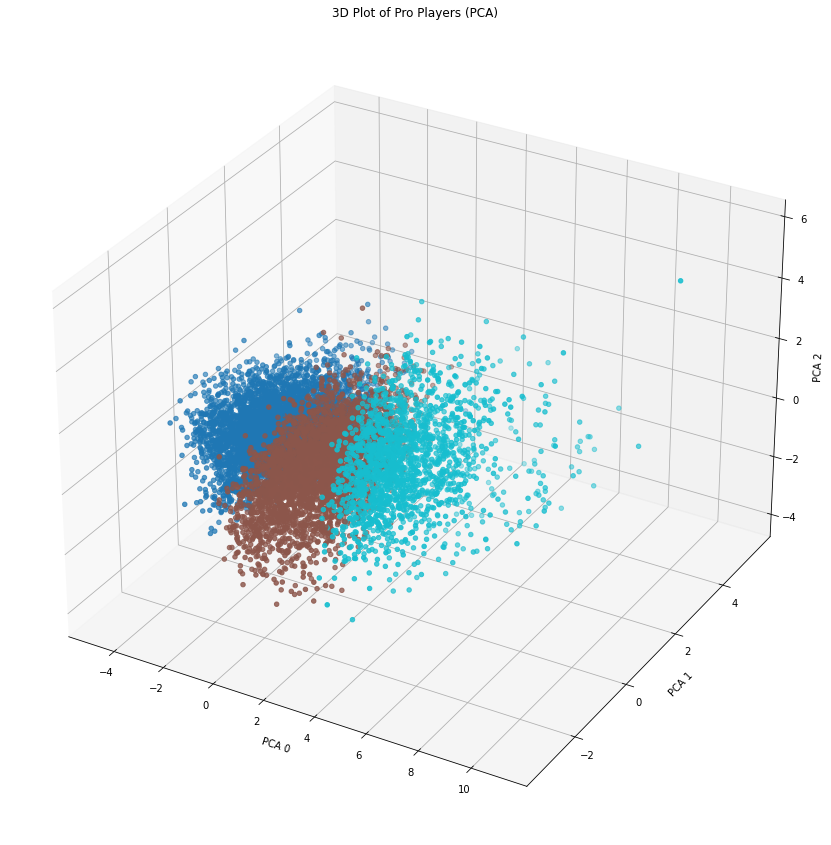

In [32]:
# plot 3d of pro PCA
ax = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.set_title('3D Plot of Pro Players (PCA)')
ax.scatter(
    xs=subset_pro_df.loc[:]['PC0'], 
    ys=subset_pro_df.loc[:]['PC1'], 
    zs=subset_pro_df.loc[:]['PC2'], 
    c=subset_pro_df.loc[:]['Cluster'], 
    cmap='tab10'
)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()

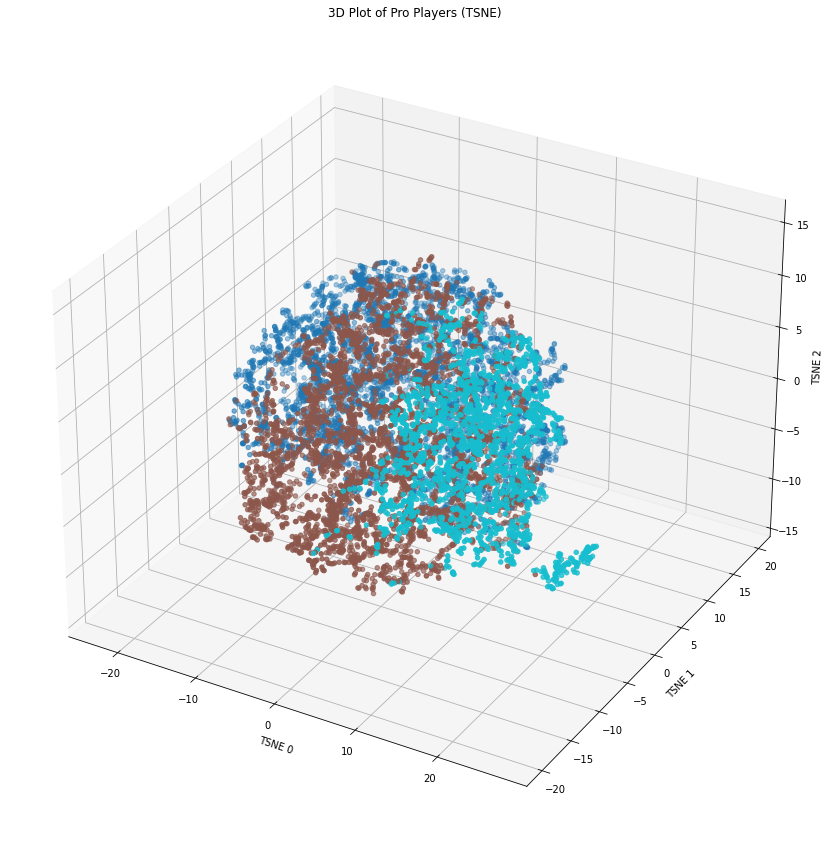

In [33]:
# plot 3d of pro TSNE
ax = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.set_title('3D Plot of Pro Players (TSNE)')
ax.scatter(
    xs=subset_pro_df.loc[rndperm_pro,:]['TSNE0'], 
    ys=subset_pro_df.loc[rndperm_pro,:]['TSNE1'], 
    zs=subset_pro_df.loc[rndperm_pro,:]['TSNE2'], 
    c=subset_pro_df.loc[rndperm_pro, :]['Cluster'], 
    cmap='tab10'
)
ax.set_xlabel('TSNE 0')
ax.set_ylabel('TSNE 1')
ax.set_zlabel('TSNE 2')
plt.show()

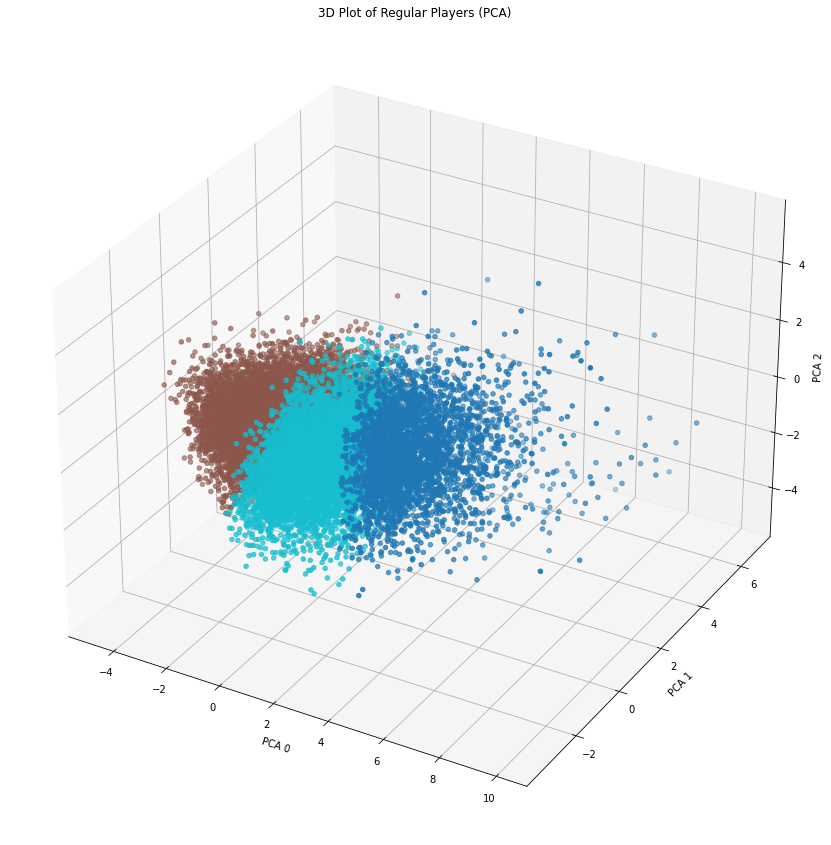

In [34]:
# plot 3d of pro PCA
ax = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.set_title('3D Plot of Regular Players (PCA)')
ax.scatter(
    xs=subset_reg_df.loc[:]['PC0'], 
    ys=subset_reg_df.loc[:]['PC1'], 
    zs=subset_reg_df.loc[:]['PC2'], 
    c=subset_reg_df.loc[:]['Cluster'], 
    cmap='tab10'
)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()

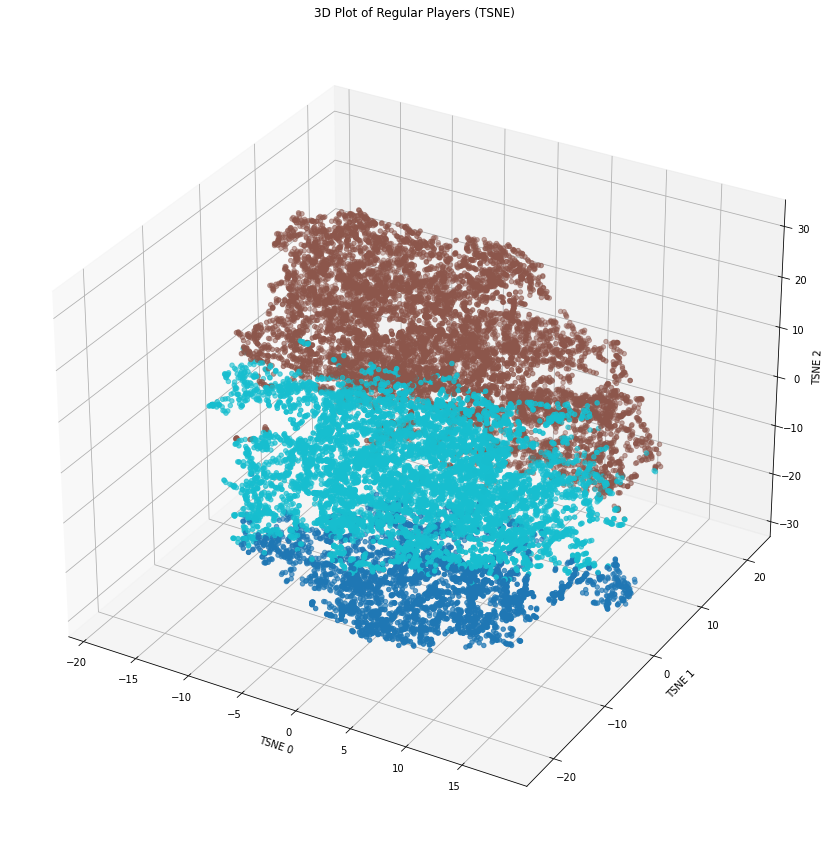

In [55]:
# plot 3d of reg TSNE
ax = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.set_title('3D Plot of Regular Players (TSNE)')
ax.scatter(
    xs=subset_reg_df.loc[rndperm_reg,:]['TSNE0'], 
    ys=subset_reg_df.loc[rndperm_reg,:]['TSNE1'], 
    zs=subset_reg_df.loc[rndperm_reg,:]['TSNE2'], 
    c=subset_reg_df.loc[rndperm_reg, :]['Cluster'], 
    cmap='tab10'
)
ax.set_xlabel('TSNE 0')
ax.set_ylabel('TSNE 1')
ax.set_zlabel('TSNE 2')
plt.show()

# 2D PLOT 

In [36]:
# Plotting 2d
startTime = time.time()

# getting 2 TSNE components for 2d plot
d2_sub_pro_tsne = get_tsne(sub_pro_pc_df, 2)
d2_sub_reg_tsne = get_tsne(sub_reg_pc_df, 2)

executionTime = (time.time() - startTime)

print('Execution time in seconds: ' + str(executionTime))

c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\dwyen\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Execution time in seconds: 175.16891407966614


In [37]:
d2_pro_tsne_df = pd.DataFrame(d2_sub_pro_tsne, columns = ['2D-TSNE0', '2D-TSNE1'])
d2_reg_tsne_df = pd.DataFrame(d2_sub_reg_tsne, columns = ['2D-TSNE0', '2D-TSNE1'])

subset_reg_df = pd.concat([subset_reg_df, d2_reg_tsne_df], axis=1)
subset_pro_df = pd.concat([subset_pro_df, d2_pro_tsne_df], axis=1)

subset_pro_df

deaths  kills  assists  kda  gold_per_min_raw  xp_per_min_raw  \
0          8      7       22    3               324             624   
1          8      1        8    1               304             383   
2          5      6       16    3               489             665   
3          5     19        4    3               713             839   
4          9     10       20    3               500             668   
...      ...    ...      ...  ...               ...             ...   
9482       8      1        8    1               275             412   
9483      12      4        7    0               226             289   
9484       4     27       20    9               825             899   
9485       0      4       11   15               826             746   
9486       9      4       37    4               340             604   

      kills_per_min_raw  last_hits_per_min_raw       PC0       PC1       PC2  \
0              0.175219               2.077597 -0.899309  1.424589  0.350040   
1              0.032241               4.255776 -2.333477 -0.926838 -0.738468   
2              0.183767               4.563553  0.185020  0.282844 -0.440157   
3              0.506892              10.484660  3.928308 -1.669346  1.674912   
4              0.320171               5.410886  0.659903  0.690033  1.058621   
...                 ...                    ...       ...       ...       ...   
9482           0.029571               1.123706 -2.709984 -0.482335 -0.502608   
9483           0.123520               1.080803 -3.093392 -0.647658  0.935600   
9484           0.625966               8.717156  5.729915  1.222152  2.341602   
9485           0.125523              13.964435  3.552368 -0.531819 -3.466651   
9486           0.099792               1.322245 -1.491892  3.235661 -0.196510   

           PC3      TSNE0      TSNE1      TSNE2  Cluster   2D-TSNE0   2D-TSNE1  
0    -0.384309   4.519973   8.348733  -1.326156        0 -16.646374  46.493420  
1     0.446680 -11.948339   1.747242  -7.274708        0 -37.383953 -49.513359  
2    -0.279363   5.106826  -2.525380  -5.350808        1   6.949409  30.790174  
3     0.270491  16.336672 -10.934327  10.459717        2  68.135109  29.090532  
4    -0.718423   6.645748   0.390074   5.052519        1   7.609100  12.647436  
...        ...        ...        ...        ...      ...        ...        ...  
9482  0.720959 -14.953732   6.687454  -7.202353        0 -49.576992 -45.771141  
9483  0.966221 -20.688589   7.445122   0.815503        0 -69.655136 -44.170399  
9484  0.085289  20.928274  -6.733983   8.993147        2  69.350937  49.792503  
9485 -0.048509  16.695843 -15.456014  -2.995458        2  91.491829  11.671828  
9486 -1.684631   7.696375  16.304565  -2.306898        0 -55.224747  53.114082  

[9487 rows x 18 columns]

# Comparing 2D Plots of PCA VS. TSNE

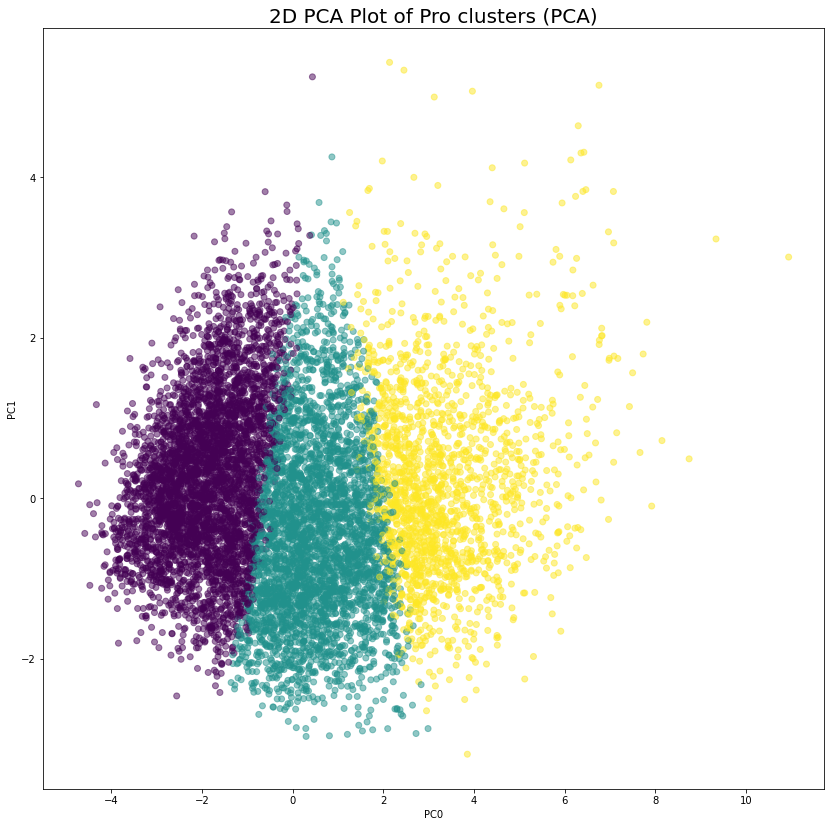

In [38]:
fig = plt.figure(figsize=(14,14))

plt.scatter(subset_pro_df[:]['PC0'], subset_pro_df[:]['PC1'], c=subset_pro_df['Cluster'], alpha=0.5)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('2D PCA Plot of Pro clusters (PCA)', fontsize=20);

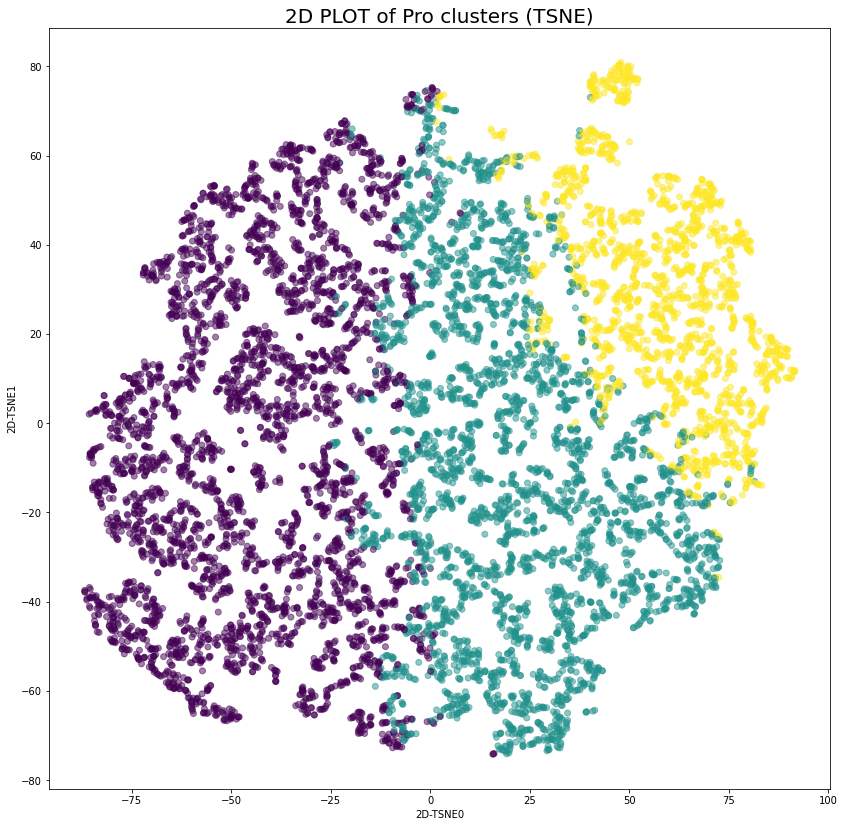

In [39]:
fig = plt.figure(figsize=(14,14))

plt.scatter(subset_pro_df[:]['2D-TSNE0'], subset_pro_df[:]['2D-TSNE1'], c=subset_pro_df['Cluster'], alpha=0.5)
plt.xlabel('2D-TSNE0')
plt.ylabel('2D-TSNE1')
plt.title('2D PLOT of Pro clusters (TSNE)', fontsize=20);

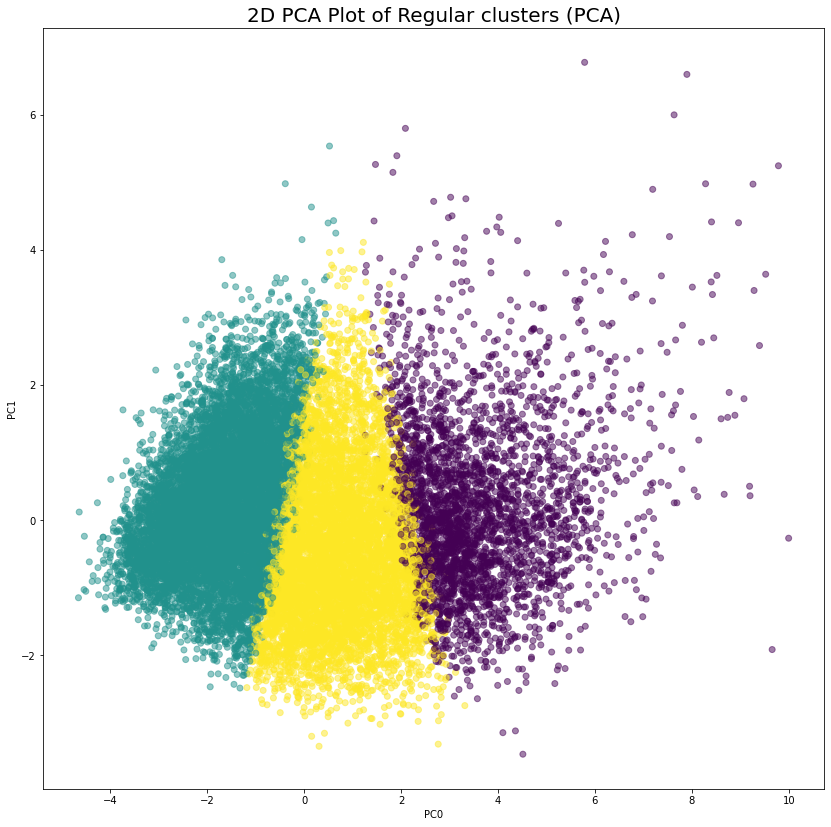

In [40]:
fig = plt.figure(figsize=(14,14))

plt.scatter(subset_reg_df[:]['PC0'], subset_reg_df[:]['PC1'], c=subset_reg_df['Cluster'], alpha=0.5)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('2D PCA Plot of Regular clusters (PCA)', fontsize=20);

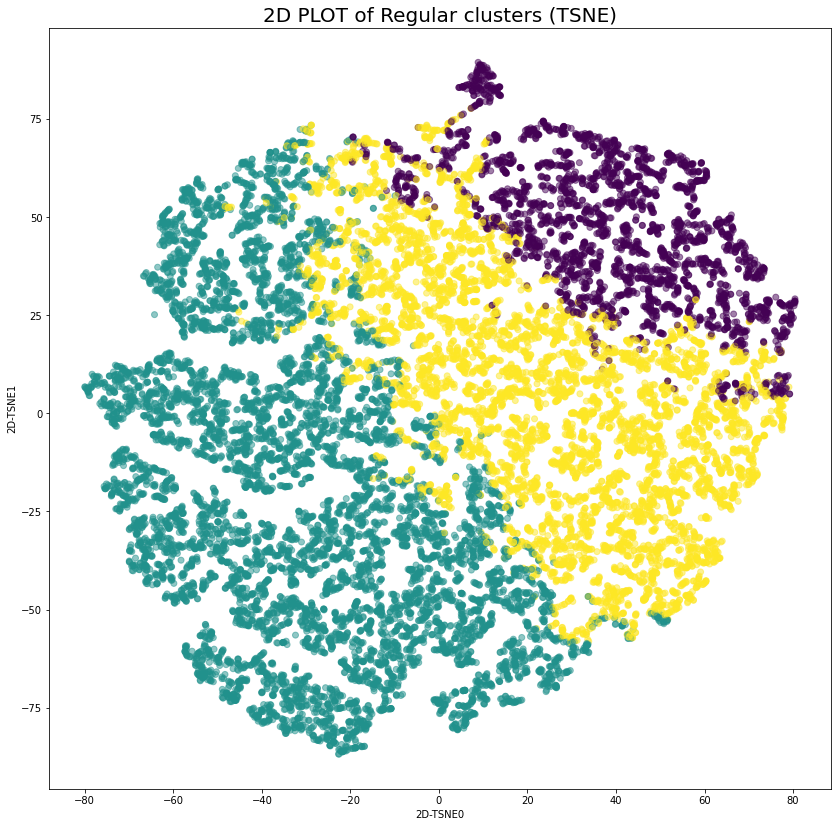

In [41]:
fig = plt.figure(figsize=(14,14))

plt.scatter(subset_reg_df[:]['2D-TSNE0'], subset_reg_df[:]['2D-TSNE1'], c=subset_reg_df['Cluster'], alpha=0.5)
plt.xlabel('2D-TSNE0')
plt.ylabel('2D-TSNE1')
plt.title('2D PLOT of Regular clusters (TSNE)', fontsize=20);

In [42]:
km_pro.cluster_centers_

array([[-1.89372872,  0.28768179,  0.06476948,  0.10858803],
       [ 0.54011239, -0.4568386 , -0.17147886, -0.22920096],
       [ 3.36003677,  0.24977354,  0.19543086,  0.20941546]])

In [43]:
km_reg.cluster_centers_

array([[ 3.63639223,  0.23297834,  0.2456026 ,  0.25752542],
       [-1.71690401,  0.26102647,  0.05445127,  0.09490688],
       [ 0.72789985, -0.46467338, -0.18568035, -0.2468031 ]])

In [44]:
# cluster centers are based on PC0, PC1, PC2, PC3

# To check if test_player plays more like a pro
# we would calculate that player's principle components in both Pro and Reg datasets
# Then compare the euclidean distance of test_player to both cluster centers in pro and reg dataframes
# shortest distance should indicate whether that player plays more like a pro than a regular player

In [45]:
# get the updated information on test_player per dataframe
test_player_pro = subset_pro_df.tail(1)
test_player_reg = subset_reg_df.tail(1)

In [46]:
test_pro_point = test_player_pro[['PC0', 'PC1', 'PC2', 'PC3']].to_numpy()
test_reg_point = test_player_reg[['PC0', 'PC1', 'PC2', 'PC3']].to_numpy()
print(test_reg_point)
print(test_pro_point)

[[-1.09828682  3.30021575 -0.13988428 -1.70694778]]
[[-1.49189188  3.23566057 -0.19651024 -1.68463106]]


In [47]:
# get coordinates of pro cluster center that the test player is in
pro_centroid = km_pro.cluster_centers_[test_player_pro['Cluster'].values[0]]

# coordinates of reg cluster the test player is in
reg_centroid = km_reg.cluster_centers_[test_player_reg['Cluster'].values[0]]

print(reg_centroid)
print(pro_centroid)

[-1.71690401  0.26102647  0.05445127  0.09490688]
[-1.89372872  0.28768179  0.06476948  0.10858803]


# Calculating distance to centroids

In [48]:

pro_distance = distance.euclidean(test_pro_point, pro_centroid)
reg_distance = distance.euclidean(test_reg_point, reg_centroid)

print('pro distance:', pro_distance)
print('reg distance:', reg_distance)

if (pro_distance < reg_distance):
    print('The test player plays more like the average pro player')
else:
    print('The test player plays more like the average regular (high skill) player')

pro distance: 3.483669550081325
reg distance: 3.592186687865818
The test player plays more like the average pro player


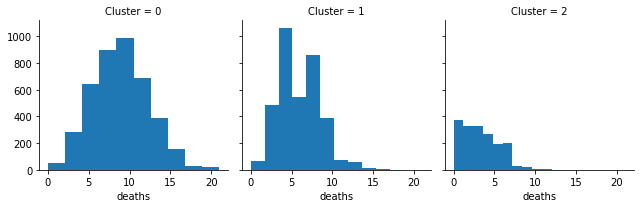

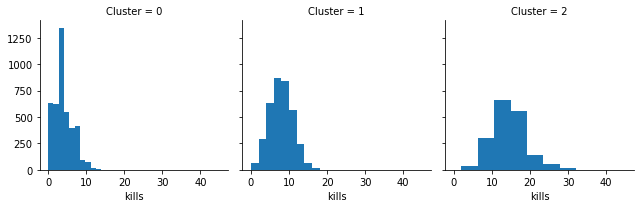

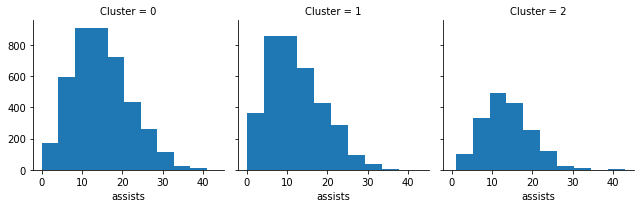

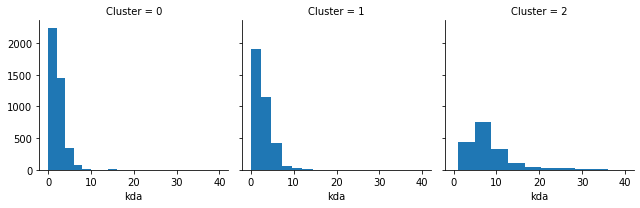

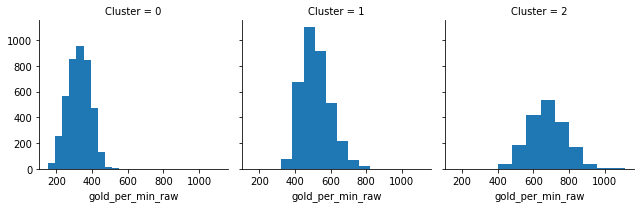

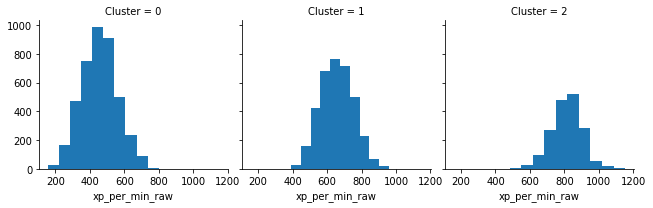

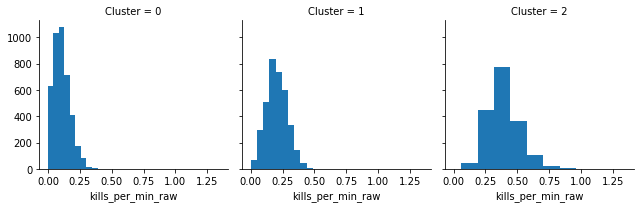

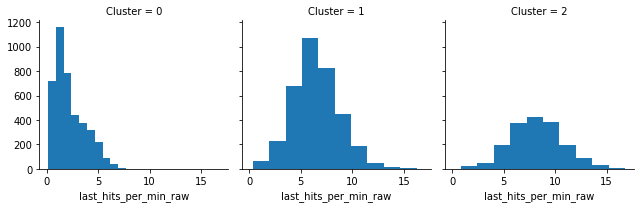

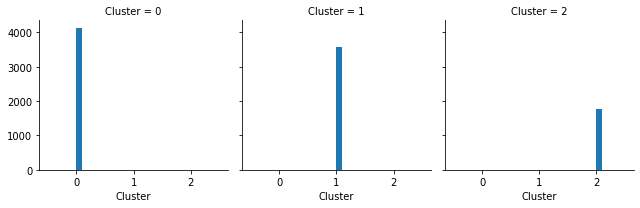

In [49]:
# todo add clusters back to original sample dataframes
# plot histograms of each feature per cluster

def get_histograms(df, indexes = []):
    for cluster in df:
        grid = sns.FacetGrid(df, col='Cluster')
        grid.map(plt.hist, cluster)
        
get_histograms(subset_pro_df[['deaths', 'kills', 'assists', 'kda', 'gold_per_min_raw', 'xp_per_min_raw', 'kills_per_min_raw', 'last_hits_per_min_raw', 'Cluster']])

In [50]:
# from this I can infer that clusters for Pro players:
# cluster 2 = Core players (Position 1-3)
# cluster 0 = Support players (Position 4-5)
# cluster 1 = Inconclusive
# cluster 1 could include high performing supports or
#           underperforming cores or Position 3

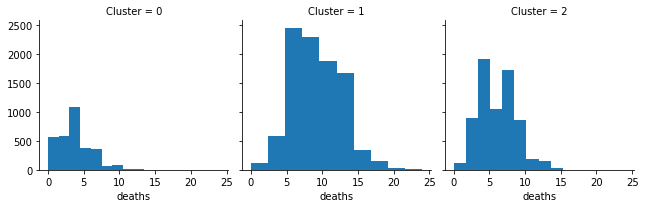

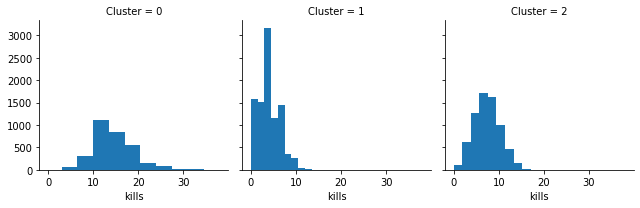

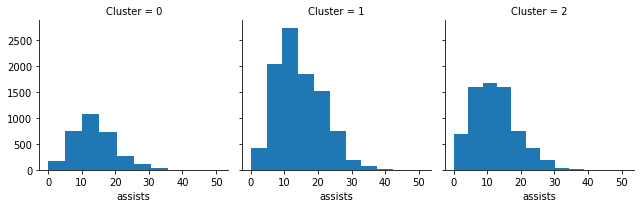

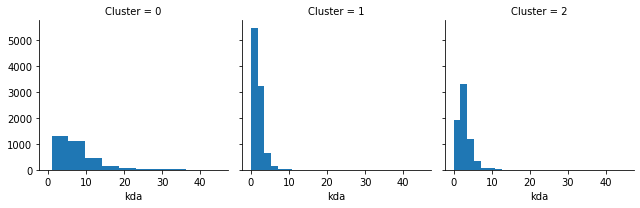

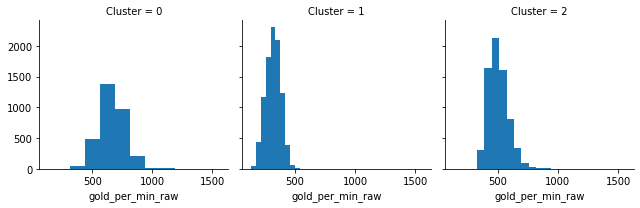

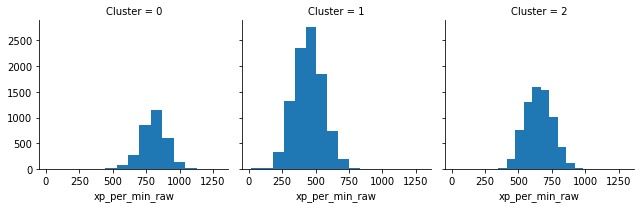

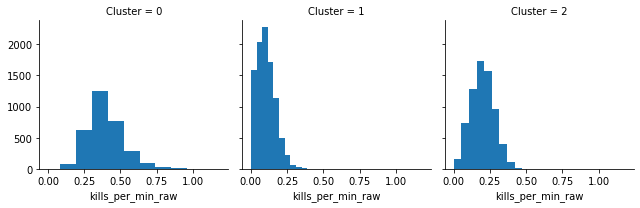

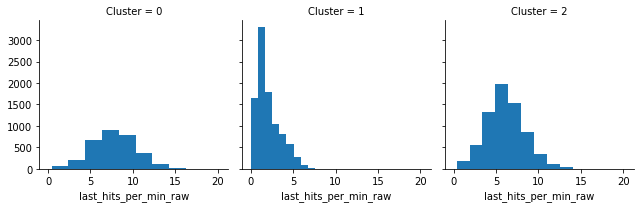

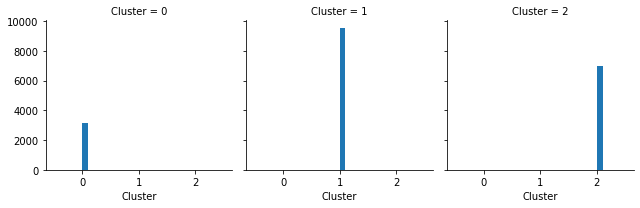

In [51]:
get_histograms(subset_reg_df[['deaths', 'kills', 'assists', 'kda', 'gold_per_min_raw', 'xp_per_min_raw', 'kills_per_min_raw', 'last_hits_per_min_raw', 'Cluster']])

In [52]:
# from this I can infer that clusters for Regular players:
# cluster 0 = Core players (Position 1-3)
# cluster 1 = Support players (Position 4-5)
# cluster 2 = Inconclusive
# cluster 2 could include high performing supports or
#           underperforming cores or Position 3

In [53]:
print(test_player_pro['Cluster'])
print(test_player_reg['Cluster'])

9486    0
Name: Cluster, dtype: int32
19652    1
Name: Cluster, dtype: int32


In [54]:
# from this we can infer that test_player plays the core role
# more like the average pro player than an average high skill player

In [192]:
# removing unnecessary column added by test player
pro_df.drop(['pros'], axis=1)

match_id  account_id  deaths  kills  assists  hero_id  win  lose  kda  \
0     5839738768    48823667       8      7       22        5    1     0    3   
1     5411456140   835676420       8      1        8       98    0     1    1   
2     5967219701    26771994       5      6       16       16    1     0    3   
3     5812356294   213326423       5     19        4       70    0     1    3   
4     5263282308    85375207       9     10       20       98    1     0    3   
...          ...         ...     ...    ...      ...      ...  ...   ...  ...   
9482  6403123685   276901240       8      1        8       84    0     1    1   
9483  5576074840    82507234      12      4        7      119    0     1    0   
9484  6449482073   101586543       4     27       20       13    1     0    9   
9485  6458974436    85367644       0      4       11      109    1     0   15   
9486  6418990888   121573285       9      4       37       97    1     0    4   

      gold_per_min_raw  xp_per_min_raw  kills_per_min_raw  \
0                  324             624           0.175219   
1                  304             383           0.032241   
2                  489             665           0.183767   
3                  713             839           0.506892   
4                  500             668           0.320171   
...                ...             ...                ...   
9482               275             412           0.029571   
9483               226             289           0.123520   
9484               825             899           0.625966   
9485               826             746           0.125523   
9486               340             604           0.099792   

      last_hits_per_min_raw  gold_per_min_pct  xp_per_min_pct  \
0                  2.077597          0.560472        0.864307   
1                  4.255776          0.065666        0.076923   
2                  4.563553          0.585382        0.559468   
3                 10.484660          0.935990        0.855072   
4                  5.410886          0.664165        0.637899   
...                     ...               ...             ...   
9482               1.123706          0.223158        0.234211   
9483               1.080803          0.104135        0.065850   
9484               8.717156          0.993711        0.935849   
9485              13.964435          0.951705        0.721591   
9486               1.322245          0.340249        0.572614   

      kills_per_min_pct  last_hits_per_min_pct  \
0              0.836775               0.831858   
1              0.033771               0.429644   
2              0.558804               0.432558   
3              0.870773               0.995169   
4              0.808630               0.692308   
...                 ...                    ...   
9482           0.128947               0.363684   
9483           0.486983               0.376723   
9484           0.978616               0.943396   
9485           0.380682               0.980114   
9486           0.475795               0.098202   

                                               non_pros  Cluster  
0                                [417604379, 296702734]        0  
1          [181863221, 158652775, 223831161, 338261724]        0  
2          [122571057, 152051501, 182016245, 181145254]        1  
3     [81006230, 158707562, 76823347, 47381526, 9137...        2  
4     [1025693753, 1062104047, 383875956, 136571075,...        1  
...                                                 ...      ...  
9482  [350162865, 419224667, 919090208, 1042216034, ...        0  
9483  [259142899, 117801871, 191239768, 197112752, 2...        0  
9484       [136818379, 138991424, 138094966, 136769473]        2  
9485       [175057685, 155807130, 167708749, 205091503]        2  
9486                                                NaN        0  

[9487 rows x 19 columns]

In [168]:
import requests
import json

In [200]:
query = 'https://api.opendota.com/api/heroes'

r = requests.get(query)
data = json.loads(r.text)

def get_hero_name(ids, data):
    heroes = []
    for id in ids:
        for entry in data:
            if entry['id'] == id:
                heroes.append(entry['localized_name'])
    return heroes

In [175]:
from collections import Counter

In [201]:
def get_most_heroes(df):
    for i in range(df['Cluster'].nunique()):
        heroes = df.loc[df['Cluster'] == i, ['hero_id']].to_numpy().flatten()

        print(f'Cluster {i}:')
        c = Counter(heroes)
        # prints tuples including count
        print(c.most_common(5))
        heroes = list(zip(*c.most_common(5)))[0]
        #print(heroes)
        print(get_hero_name(heroes, data))
        print('\n')
        

# cluster 0 = Core players (Position 1-3)
# cluster 1 = Support players (Position 4-5)
# cluster 2 = Inconclusive
print('----Most Common Hero for Regulars----')
print('[ 0 = Core, 1 = Support, 2 = Inconclusive ]')
get_most_heroes(reg_df)

# cluster 2 = Core players (Position 1-3)
# cluster 0 = Support players (Position 4-5)
# cluster 1 = Inconclusive
print('----Most Common Hero for Pros----')
print('[ 0 = Support, 1 = Inconclusive, 2 = Core ]')
get_most_heroes(pro_df)


----Most Common Hero for Regulars----
[ 0 = Core, 1 = Support, 2 = Inconclusive ]
Cluster 0:
[(44, 120), (1, 112), (39, 104), (8, 97), (19, 90)]
['Phantom Assassin', 'Anti-Mage', 'Queen of Pain', 'Juggernaut', 'Tiny']


Cluster 1:
[(86, 397), (26, 279), (84, 256), (14, 252), (27, 219)]
['Rubick', 'Lion', 'Ogre Magi', 'Pudge', 'Shadow Shaman']


Cluster 2:
[(129, 154), (74, 146), (39, 141), (106, 132), (8, 128)]
['Mars', 'Invoker', 'Queen of Pain', 'Ember Spirit', 'Juggernaut']


----Most Common Hero for Pros----
[ 0 = Support, 1 = Inconclusive, 2 = Core ]
Cluster 0:
[(86, 161), (26, 107), (9, 105), (128, 100), (121, 95)]
['Rubick', 'Lion', 'Mirana', 'Snapfire', 'Grimstroke']


Cluster 1:
[(120, 94), (129, 89), (39, 80), (8, 75), (106, 75)]
['Pangolier', 'Mars', 'Queen of Pain', 'Juggernaut', 'Ember Spirit']


Cluster 2:
[(46, 72), (10, 70), (1, 57), (39, 54), (44, 54)]
['Templar Assassin', 'Morphling', 'Anti-Mage', 'Queen of Pain', 'Phantom Assassin']


